In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import gen_synthetic_ts as gst

In [8]:
# get the synthetic timeserie

df_ts = gst.generate_synthetic_ts()
df_ts

,trend,seasonality,residual,DateTime,Value
0,0.000,5.082107,1.461450,2010-01-01,6.543557
1,0.001,5.279406,2.704887,2010-01-02,7.985293
2,0.002,5.463582,2.952176,2010-01-03,8.417758
3,0.003,5.631210,1.210661,2010-01-04,6.844871
4,0.004,5.779161,-0.196897,2010-01-05,5.586264
...,...,...,...,...,...
1455,1.455,14.655923,0.760019,2013-12-26,16.870942
1456,1.456,15.432413,0.793592,2013-12-27,17.682004
1457,1.457,16.201044,1.438552,2013-12-28,19.096596
1458,1.458,16.950705,2.640163,2013-12-29,21.048869


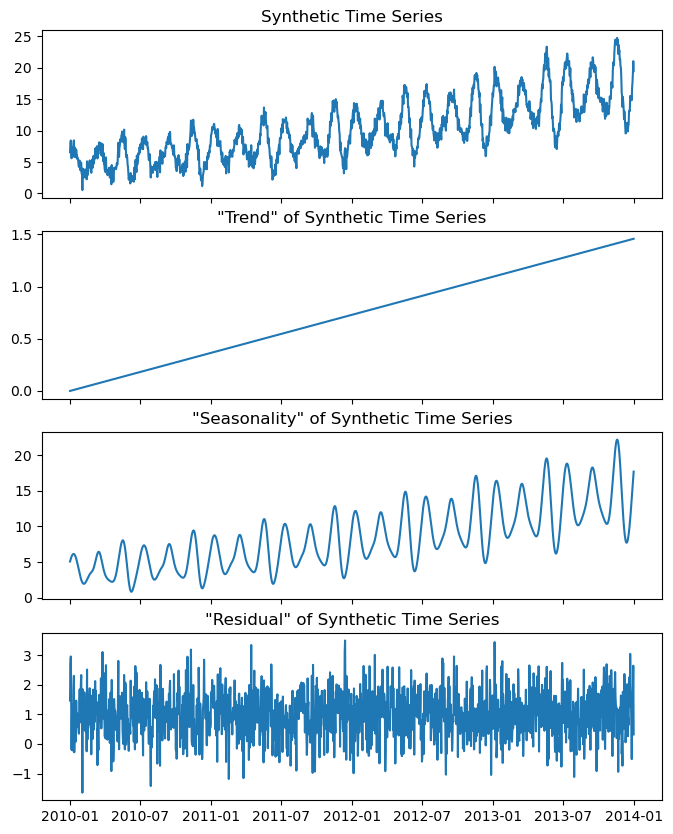

In [9]:
fig, axes = plt.subplots(figsize=(8, 10), nrows=4, ncols=1, sharex=True)

axes[0].plot(df_ts['DateTime'], df_ts['Value'])
axes[0].set_title('Synthetic Time Series')
axes[1].plot(df_ts['DateTime'], df_ts['trend'])
axes[1].set_title('"Trend" of Synthetic Time Series')
axes[2].plot(df_ts['DateTime'], df_ts['seasonality'])
axes[2].set_title('"Seasonality" of Synthetic Time Series')
axes[3].plot(df_ts['DateTime'], df_ts['residual'])
axes[3].set_title('"Residual" of Synthetic Time Series')
plt.show()

#### Apply Box-Cox Transformation on (synthetic) time series

Guerrero: Lambda: 1.0063748980049114
Guerrero: Lambda: 0.4515579707577194
MLE: Lambda: 0.4339312903736593


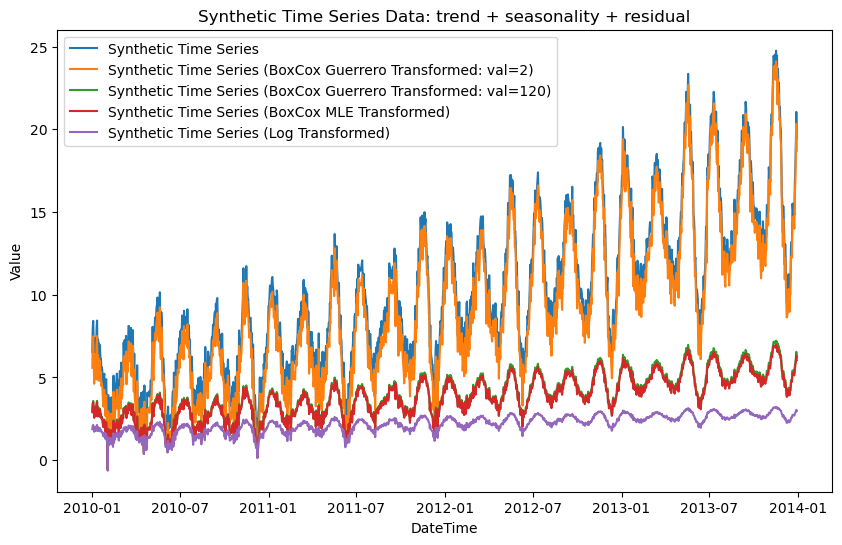

In [11]:
# 1. Forcasting and decomposition methods sometimes work better if the variance is stable across the whole time series
# 2. A BoxCox transform can stabilize the variance, but we need to pick a good value for the parameter Lambda
# 3. The Guerrero method selects Lambda that makes the variace y(lmbda) constant by minimizing the coefficient of variation.
# 4. For Guerrero method, it is important to set split parameter to get the good transofrmation. If we know the seasonality of 
#    data, split parameter is equals to that. If we are not aware of that, it is set to 2 to avoid loosing information.
#    I found it that split parameter can be affected by the noise level in the data!

from sktime.transformations.series.boxcox import BoxCoxTransformer, LogTransformer

gtfr = BoxCoxTransformer(method='guerrero', sp=2) #sp=int(365/4)
df_ts['CBGuerreroTransferedValue_2'] = gtfr.fit_transform(df_ts['Value'])
print(f'Guerrero: Lambda: {gtfr.lambda_}')


gtfr = BoxCoxTransformer(method='guerrero', sp=120)  # seasonality ~ 120
df_ts['CBGuerreroTransferedValue_120'] = gtfr.fit_transform(df_ts['Value'])
print(f'Guerrero: Lambda: {gtfr.lambda_}')


gtfr = BoxCoxTransformer(method='mle')
df_ts['CBMLETransferedValue'] = gtfr.fit_transform(df_ts['Value'])
print(f'MLE: Lambda: {gtfr.lambda_}')

ltfr = LogTransformer()
df_ts['LogTransferedValue'] = ltfr.fit_transform(df_ts['Value'])


#Plot the synthetic time series
plt.figure(figsize=(10, 6))
plt.plot(df_ts['DateTime'], df_ts['Value'], label='Synthetic Time Series')
plt.plot(df_ts['DateTime'], df_ts['CBGuerreroTransferedValue_2'], label='Synthetic Time Series (BoxCox Guerrero Transformed: val=2)')
plt.plot(df_ts['DateTime'], df_ts['CBGuerreroTransferedValue_120'], label='Synthetic Time Series (BoxCox Guerrero Transformed: val=120)')
plt.plot(df_ts['DateTime'], df_ts['CBMLETransferedValue'], label='Synthetic Time Series (BoxCox MLE Transformed)')
plt.plot(df_ts['DateTime'], df_ts['LogTransferedValue'], label='Synthetic Time Series (Log Transformed)')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data: trend + seasonality + residual')
plt.legend()
plt.show()